In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Show all columns
pd.set_option('display.max_columns', None)

In [68]:
# Read the data
player = pd.read_csv('data/player_stats.csv')

In [69]:
# Drop all all columns with missing values in salary column
player = player.dropna(subset=['salary'])

Slope:  [678791.65610851]
Intercept:  3272330.818217765
R^2 score:  -0.02914914977342331


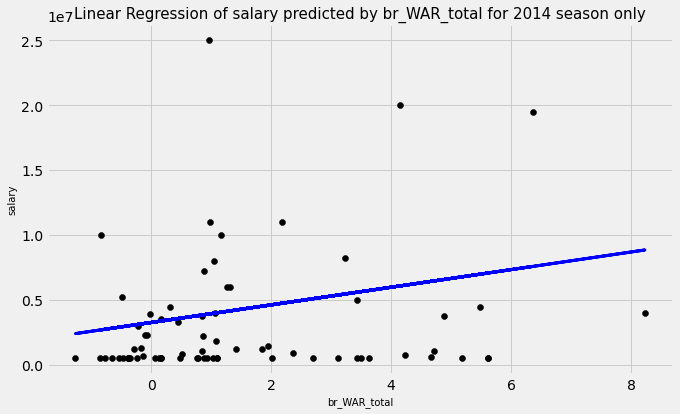

In [86]:
# Create a Linear regression of salary predicted by br_WAR_total for 2014 season only
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a subset dataset for yearID 2014
player_2014 = player[player['yearID'] == 2014]

# Create X and y
X = player_2014[['br_WAR_total']]
y = player_2014['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Print the coefficients
print("Slope: ", reg.coef_)
print("Intercept: ", reg.intercept_)
# Print the R^2 for the model against the test data
print("R^2 score: ", reg.score(X_test, y_test))

# Plot the model
# Figure size
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, reg.predict(X_test), color='blue', linewidth=3)
# x_label
plt.xlabel('br_WAR_total', size =10)
# y_label
plt.ylabel('salary', size = 10)
# title
plt.title('Linear Regression of salary predicted by br_WAR_total for 2014 season only', size = 15)
# show the plot
plt.show()